# QA Clicks on Table of Contents

## Goal

QA the events of clicks on ToC after the instrumentation updates on 2023-04-13. 

TICKET: [T332612](https://phabricator.wikimedia.org/T332612)


QAed on Apr 28, 2023

In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [2]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [3]:
options(repr.plot.width = 15, repr.plot.height = 10)

## Instrumentation Note
### Old Table of Contents

Clicks on old table of contents in vector skin are not logged. Confirmed with WEB team that we don't need to track as we are not going to compare with ToC in vector skin.
<br />
<br />
<img src="Figures/toc_old.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />

### New Table of Contents
#### Clicks on ToC
ToC on left sidebar ,logged with `event.name='ui.sidebar-toc'` <br />
Scenario 1: ToC with sticky header <br />
<img src="Figures/toc_new1.png" width="800" height="600" align="center"  style="border: 5px solid LightSteelBlue" />
<br />
<br />
<br />
Scenario 2: ToC at top when main menu is hiden <br />
<img src="Figures/toc_new2.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />
<br />
<br />
<br />


ToC by page title, Before 2023-03-16, clicks were logged with `event.name='toc-{{section ID}}.vector-toc.unpinned'`. Since 2023-03-16, some of clicks had been logged with `event.name='toc-{{section ID}}.unknown.unpinned'` (bug). After T332612 was deployed on 2023-04-13, clicks are logged with `event.name='toc-heading.toc-pinned-disabled'` <br />
Scenario 1: ToC by page title at top <br />
<img src="Figures/toc_new3.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />
<br />
<br />
<br />
Scenario 2: ToC by page title with sticky header <br />
<img src="Figures/toc_new4.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />
<br />
<br />
<br />

ToC at narrow widths (<1000px) when the ToC is pinned to the left sidebar, clicked were logged with `event.name='toc-{{section ID}}.vector-toc.pinned'` or `event.name='toc-{{section ID}}.unknown.pinned'`(bug). After T332612 was deployed on 2023-04-13, clicks are logged with `event.name='toc-heading.toc-pinned-enabled'`
<br />
<br />
<img src="Figures/toc_new6_narrow.png" width="400" height="300" align="center" style="border: 5px solid LightSteelBlue" />

#### Pin/unpin
Pin is logged with `event.name='pinnable-header.vector-toc.pin'` <br />
Scenario 1: Pin the ToC at top to sidebar: 
<img src="Figures/toc_to_pin1.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />
Scenario 2: Pin the ToC with sticky header to sidebar: 
<img src="Figures/toc_to_pin2.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />
<br />
<br />
<br />
Unpin is logged with `event.name='pinnable-header.vector-toc.unpin'` <br />
<img src="Figures/toc_to_unpin.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />
<br />
<br />
<br />

#### Clicks on dropdown menu
Click on dropdown at top, logged with `event.name='ui.dropdown-vector-page-titlebar-toc'` <br />
<img src="Figures/toc_dropdown1.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />
<br />
<br />
<br />
Click on dropdown with sticky header, logged with `event.name='ui.dropdown-vector-sticky-header-toc'` <br />
<img src="Figures/toc_dropdown2.png" width="800" height="600" align="center" style="border: 5px solid LightSteelBlue" />

### Open question

What is “floaty hamburger TOC” mentioned in [T332612](https://phabricator.wikimedia.org/T332612)? Is it https://jumpshare.com/v/UtO4q0bHHJVMg4gKMPmK?
Need clarification on this terminology.




## Daily Trend

In [8]:
query_test_daily <- "
SELECT TO_DATE(dt) AS event_date, event.skinVersion, event.name, count(1) AS clicks
FROM event_sanitized.DesktopWebUIActionsTracking
WHERE wiki='enwiki'
AND year=2023
AND event.action='click' 
AND event.name IN ('toc-heading.toc-pinned-disabled', 'toc-heading.toc-pinned-enabled')
GROUP BY TO_DATE(dt), event.skinVersion, event.name
"

In [9]:
df_test_daily <- wmfdata::query_hive(query_test_daily)

Don't forget to authenticate with Kerberos using kinit



In [10]:
df_test_daily

event_date,skinversion,name,clicks
<chr>,<int>,<chr>,<int>
2023-04-15,2,toc-heading.toc-pinned-enabled,879
2023-04-24,2,toc-heading.toc-pinned-enabled,949
2023-04-17,2,toc-heading.toc-pinned-disabled,511
2023-04-26,2,toc-heading.toc-pinned-disabled,446
2023-04-20,2,toc-heading.toc-pinned-enabled,956
2023-04-13,2,toc-heading.toc-pinned-disabled,36
2023-04-22,2,toc-heading.toc-pinned-disabled,393
2023-04-16,2,toc-heading.toc-pinned-enabled,898
2023-04-25,2,toc-heading.toc-pinned-enabled,1015


In [11]:
df_test_daily$event_date <- as.Date(df_test_daily$event_date)

In [12]:
df_test_daily %>%
  arrange(event_date) %>% 
    head(5)

,event_date,skinversion,name,clicks
,<date>,<int>,<chr>,<int>
1,2023-04-13,2,toc-heading.toc-pinned-disabled,36
2,2023-04-13,2,toc-heading.toc-pinned-enabled,154
3,2023-04-14,2,toc-heading.toc-pinned-disabled,467
4,2023-04-14,2,toc-heading.toc-pinned-enabled,987
5,2023-04-15,2,toc-heading.toc-pinned-enabled,879


In [13]:
df_test_daily  %>%
   filter(skinversion==1)

event_date,skinversion,name,clicks
<date>,<int>,<chr>,<int>


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


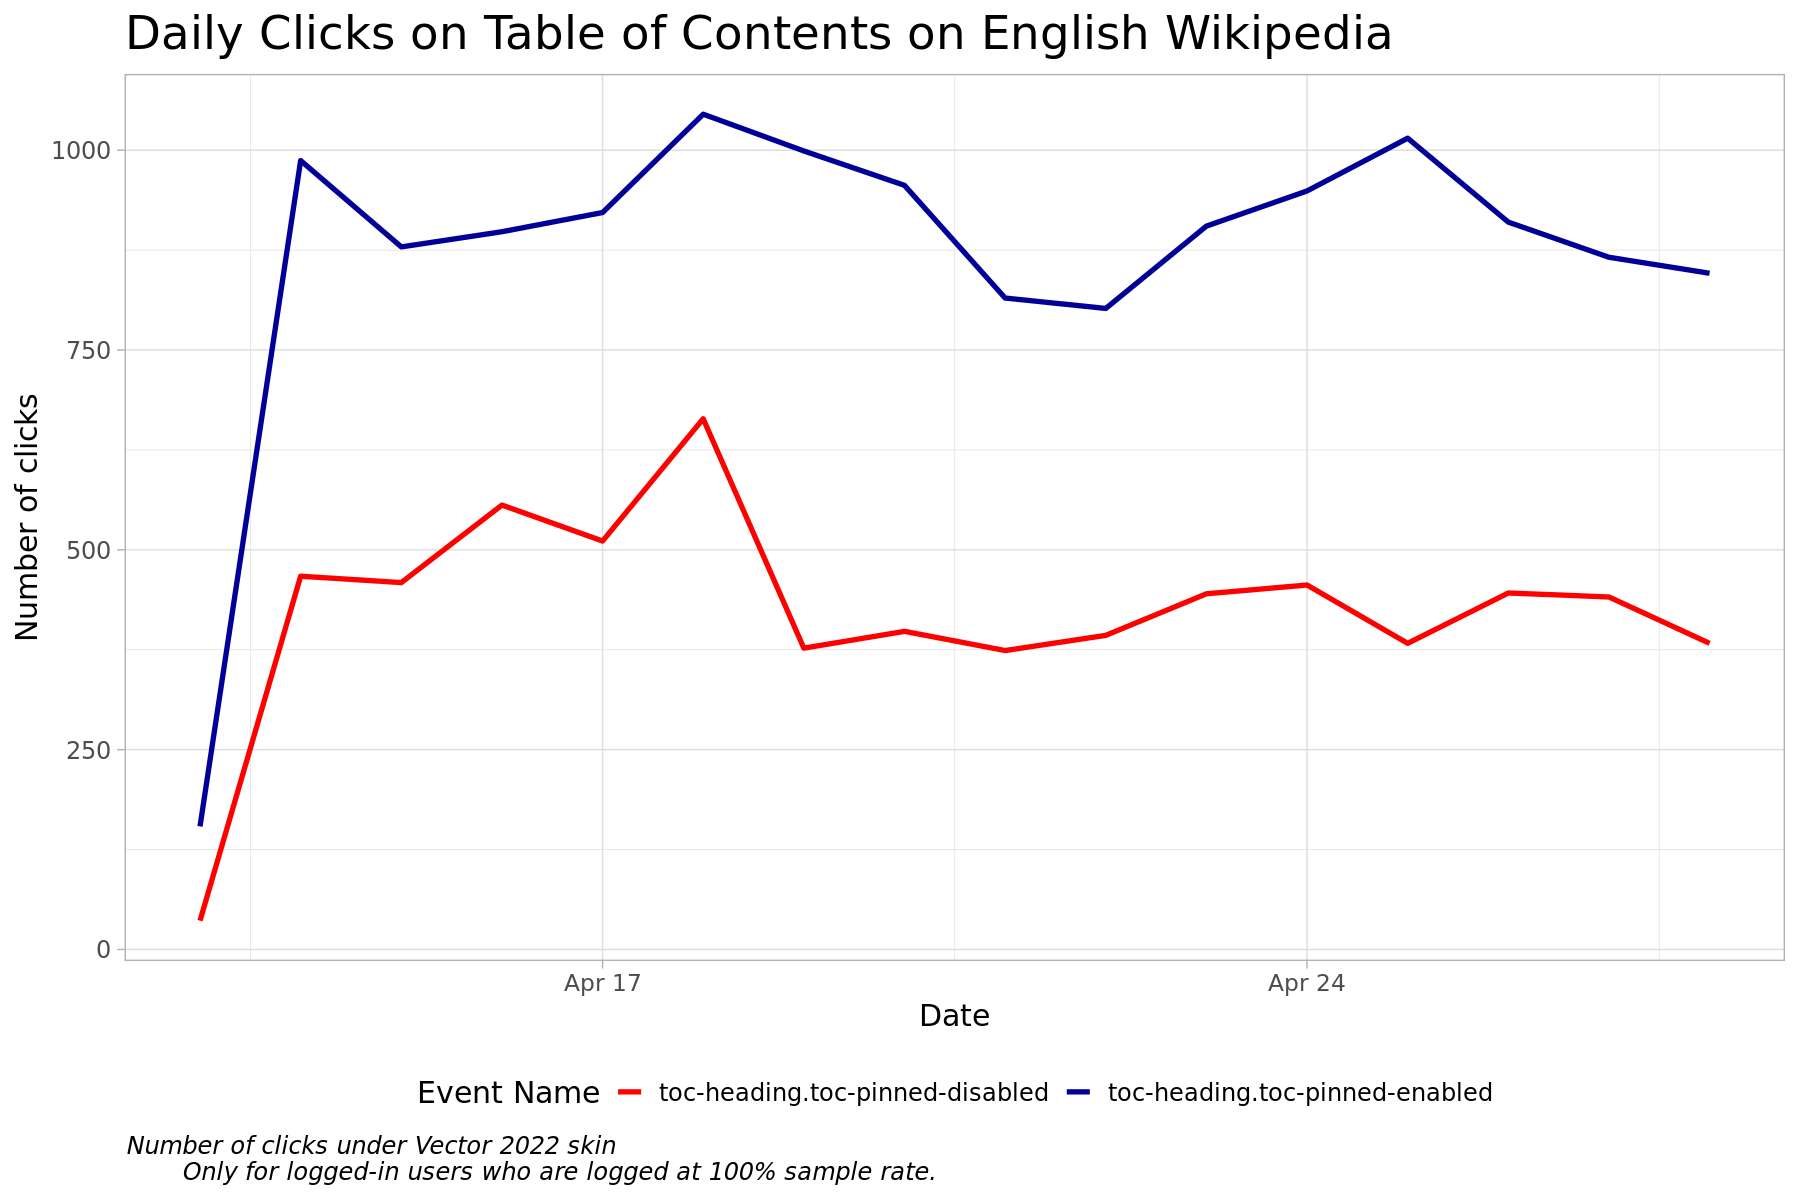

In [14]:
toc_click_g <- df_test_daily  %>%
   filter(skinversion==2) %>%
   ggplot(mapping=aes(x=event_date, y=clicks, color=name)) +
   geom_line( size = 1.5) +
  scale_color_manual(values= c("#FF0000", "#000099"), name = "Event Name")  +
  labs(title = 'Daily Clicks on Table of Contents on English Wikipedia',
     x = 'Date',
     y = 'Number of clicks',
     caption = "Number of clicks under Vector 2022 skin
       Only for logged-in users who are logged at 100% sample rate.") +
theme_light(base_size=18) +
theme(legend.position = "bottom", 
     plot.caption = element_text(hjust = 0, face= "italic"),
     strip.text = element_text(size = 18, colour='black'),
     axis.text.x = element_text( size = 14 ),
     plot.title = element_text(size=28))
toc_click_g


### Note
Events of 'toc-heading.toc-pinned-disabled' and 'toc-heading.toc-pinned-enabled' are captured since 2023-04-13.

## By event name and user type

In [20]:
query_event_vector22 <- "
SELECT DISTINCT event.name, event.isAnon
FROM event.DesktopWebUIActionsTracking
WHERE wiki='enwiki'
AND year=2023 and month=4 and day=27
AND event.action='click' 
AND  event.name regexp 'toc' 
AND event.skin='vector-2022'
ORDER BY event.name
LIMIT 1000
"


In [21]:
df_event_vector22  <- wmfdata::query_hive(query_event_vector22)

Don't forget to authenticate with Kerberos using kinit



In [22]:
df_event_vector22 

name,isanon
<chr>,<chr>
pinnable-header.vector-toc.pin,true
pinnable-header.vector-toc.pin,false
pinnable-header.vector-toc.unpin,true
pinnable-header.vector-toc.unpin,false
toc-heading.toc-pinned-disabled,false
toc-heading.toc-pinned-disabled,true
toc-heading.toc-pinned-enabled,false
toc-heading.toc-pinned-enabled,true
ui.dropdown-vector-page-titlebar-toc,true


### Note

As Only logged-in users can see sticky header feature, it is expected that `ui.dropdown-vector-sticky-header-toc` events are only captured from logged in users.

All 7 types of toc events under vector-2022 are available in schema. The events are: toc-heading.toc-pinned-enabled
, ui.dropdown-vector-page-titlebar-toc
, ui.dropdown-vector-sticky-header-toc
, ui.sidebar-toc
, pinnable-header.vector-toc.unpin
, pinnable-header.vector-toc.pin
,toc-heading.toc-pinned-disabled

## By skin type

In [23]:
query_test_skin <- "
SELECT DISTINCT event.name, event.skin
FROM event.DesktopWebUIActionsTracking
WHERE wiki='enwiki'
AND year=2023 and month=4 and day=27
AND event.action='click' 
AND  event.name regexp 'toc' 
"


In [24]:
df_test_skin <- wmfdata::query_hive(query_test_skin)

Don't forget to authenticate with Kerberos using kinit



In [25]:
df_test_skin

name,skin
<chr>,<chr>
ui.dropdown-vector-sticky-header-toc,vector-2022
toc-heading.toc-pinned-disabled,vector-2022
pinnable-header.vector-toc.pin,vector-2022
toc-heading.toc-pinned-enabled,vector-2022
ui.sidebar-toc,vector-2022
pinnable-header.vector-toc.unpin,vector-2022
ui.dropdown-vector-page-titlebar-toc,vector-2022


### Note

Only vector-2022 skin have toc clicks captured.   
ToC clicks under vector skin are not captured. To check with Web team.

Confirmed with Web team on May 1, 2023 in sprint meeting : we don't need to track clicks on ToC on legacy vector.